In [1]:
from collections import Counter
import csv
import math
import random
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE
# Get the machine learning algorithm k-NN
from sklearn import neighbors
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
columns = [('feature' + str(i)) for i in range(1, 561 + 1)]
def get_dataset(X_path, y_path):
    X = pd.read_csv(X_path, sep=' ')
    y = pd.read_csv(y_path, squeeze=True)
    X.columns = columns
    y.columns = 'label'
    return X, y

In [3]:
# X_train = pd.read_csv('HAPT Data Set/Train/X_train.txt',sep=' ') # Separate on space
# y_train = pd.read_csv('HAPT Data Set/Train/y_train.txt',squeeze = True) # Separate on space
X_train_valid, y_train_valid = get_dataset('HAPT Data Set/Train/X_train.txt', 'HAPT Data Set/Train/y_train.txt')
X_test, y_test = get_dataset('HAPT Data Set/Test/X_test.txt', 'HAPT Data Set/Test/y_test.txt')
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, train_size=0.8)

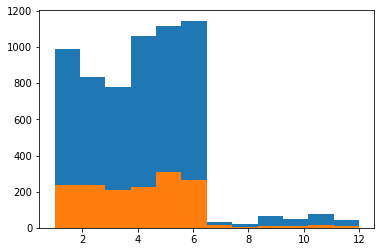

In [4]:
plt.hist(y_train, bins=12)
plt.hist(y_valid, bins=12)
plt.show()

In [5]:
print("train: ", X_train.shape)
print("validation: ", X_valid.shape)
print("test: ", X_test.shape)

train:  (6212, 561)
validation:  (1554, 561)
test:  (3161, 561)


# For Knn, it is important for the attributes to be normalized. 
The dataset is already normalised and therefore there is no need to do it again.

# Run validation on the model to find the optimal K 
This is done on vanilla Knn model without any data processing

Knn metrics all have similiar results, with euclidean being the fastest

In [6]:
# Available metrics are: euclidean, manhattan, chebyshev, minkowski, wminkowski, seuclidean, mahalanobis
knnMetric = 'euclidean' # Change this to try out different distance metrics

A K value of 5 has the highest score of 0.9626769626769627 on validation


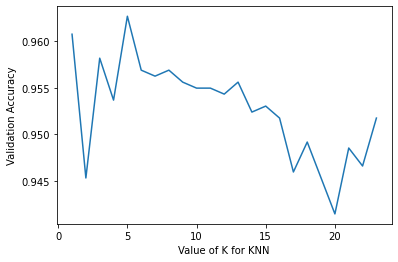

In [7]:
# try K=1 through K=24 and record testing accuracy (sqrt(561) = 23.6)
k_range = range(1, 24)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
# Available metrics are: euclidean, manhattan, chebyshev, minkowski, wminkowski, seuclidean, mahalanobis
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, metric=knnMetric)
    knn_model = knn.fit(X_train, y_train)
    y_hat_valid = knn_model.predict(X_valid)
    scores.append(accuracy_score(y_valid, y_hat_valid))
    
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Validation Accuracy')

optimalK = 0
maxScore = 0
counter = 1
for score in scores:
    if (score > maxScore):
        maxScore = score
        optimalK = counter
    counter+= 1
print('A K value of '+ str(optimalK) + ' has the highest score of ' + str(maxScore) + ' on validation')

In [8]:
# Available metrics are: euclidean, manhattan, chebyshev, minkowski, wminkowski, seuclidean, mahalanobis
knn = neighbors.KNeighborsClassifier(n_neighbors = optimalK, metric=knnMetric)
knn_model = knn.fit(X_train, y_train)

y_hat_test = knn_model.predict(X_test)
print('k value of ' + str(optimalK) + ' is used.')
print('Vanilla KNN model test report:')
print(classification_report(y_test, y_hat_test, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))

k value of 5 is used.
Vanilla KNN model test report:
              precision    recall  f1-score   support

           1       0.84      0.98      0.90       496
           2       0.87      0.90      0.88       471
           3       0.96      0.78      0.86       420
           4       0.91      0.78      0.84       508
           5       0.82      0.93      0.87       555
           6       1.00      0.99      0.99       545
           7       0.81      0.74      0.77        23
           8       1.00      1.00      1.00        10
           9       0.60      0.91      0.72        32
          10       0.58      0.88      0.70        25
          11       0.82      0.47      0.60        49
          12       0.78      0.26      0.39        27

    accuracy                           0.88      3161
   macro avg       0.83      0.80      0.79      3161
weighted avg       0.89      0.88      0.88      3161



# Use SMOTE oversample to increase number of minority class

In [9]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

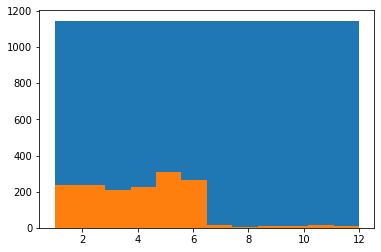

In [10]:
plt.hist(y_train, bins=12)
plt.hist(y_valid, bins=12)
plt.show()

In [11]:
print("SMOTE train: ", X_train.shape)
print("SMOTE validation: ", X_valid.shape)
print("SMOTE test: ", X_test.shape)

SMOTE train:  (13764, 561)
SMOTE validation:  (1554, 561)
SMOTE test:  (3161, 561)


A K value of 7 has the highest score of 0.9581724581724582 on validation


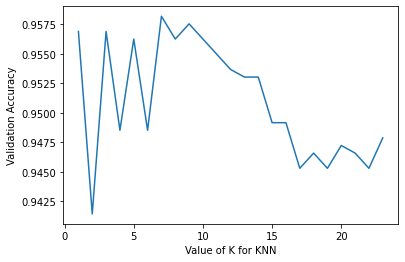

In [12]:
# try K=1 through K=24 and record testing accuracy (sqrt(561) = 23.6)
k_range = range(1, 24)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
# Available metrics are: euclidean, manhattan, chebyshev, minkowski, wminkowski, seuclidean, mahalanobis
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, metric=knnMetric)
    knn_model = knn.fit(X_train, y_train)
    y_hat_valid = knn_model.predict(X_valid)
    scores.append(accuracy_score(y_valid, y_hat_valid))
    
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Validation Accuracy')

optimalK = 0
maxScore = 0
counter = 1
for score in scores:
    if (score > maxScore):
        maxScore = score
        optimalK = counter
    counter+= 1
print('A K value of '+ str(optimalK) + ' has the highest score of ' + str(maxScore) + ' on validation')

In [13]:
# Available metrics are: euclidean, manhattan, chebyshev, minkowski, wminkowski, seuclidean, mahalanobis
knn = neighbors.KNeighborsClassifier(n_neighbors = optimalK, metric=knnMetric)
knn_model = knn.fit(X_train, y_train)

y_hat_test = knn_model.predict(X_test)
print('k value of ' + str(optimalK) + ' is used.')
print('SMOTE on dataset with KNN model test report:')
print(classification_report(y_test, y_hat_test, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))


k value of 7 is used.
SMOTE on dataset with KNN model test report:
              precision    recall  f1-score   support

           1       0.90      0.95      0.93       496
           2       0.88      0.92      0.90       471
           3       0.92      0.82      0.87       420
           4       0.88      0.82      0.85       508
           5       0.85      0.88      0.87       555
           6       1.00      0.98      0.99       545
           7       0.53      0.83      0.64        23
           8       0.59      1.00      0.74        10
           9       0.62      0.91      0.73        32
          10       0.61      0.80      0.69        25
          11       0.78      0.57      0.66        49
          12       0.65      0.41      0.50        27

    accuracy                           0.89      3161
   macro avg       0.77      0.82      0.78      3161
weighted avg       0.89      0.89      0.89      3161



# Using LDA to extract the top 11 most important features

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_valid = lda.transform(X_valid)
X_test = lda.transform(X_test)

In [15]:
print("LDA train: ", X_train.shape)
print("LDA validation: ", X_valid.shape)
print("LDA test: ", X_test.shape)

LDA train:  (13764, 11)
LDA validation:  (1554, 11)
LDA test:  (3161, 11)


A K value of 10 has the highest score of 0.9761904761904762 on validation


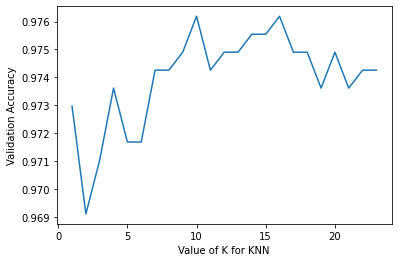

In [16]:
# try K=1 through K=24 and record testing accuracy (sqrt(561) = 23.6)
k_range = range(1, 24)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
# Available metrics are: euclidean, manhattan, chebyshev, minkowski, wminkowski, seuclidean, mahalanobis
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, metric=knnMetric)
    knn_model = knn.fit(X_train, y_train)
    y_hat_valid = knn_model.predict(X_valid)
    scores.append(accuracy_score(y_valid, y_hat_valid))
    
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Validation Accuracy')

optimalK = 0
maxScore = 0
counter = 1
for score in scores:
    if (score > maxScore):
        maxScore = score
        optimalK = counter
    counter+= 1
print('A K value of '+ str(optimalK) + ' has the highest score of ' + str(maxScore) + ' on validation')

# Combine training and validation to insert into model

In [17]:
X_final, y_final = get_dataset('HAPT Data Set/Train/X_train.txt', 'HAPT Data Set/Train/y_train.txt')
X_final = lda.transform(X_final)

In [18]:
# Available metrics are: euclidean, manhattan, chebyshev, minkowski, wminkowski, seuclidean, mahalanobis
knn = neighbors.KNeighborsClassifier(n_neighbors = optimalK, metric=knnMetric)
knn_model = knn.fit(X_final, y_final)

y_hat_test = knn_model.predict(X_test)
print('k value of ' + str(optimalK) + ' is used.')
print('LDA on SMOTEd dataset with KNN model test report:')
print(classification_report(y_test, y_hat_test, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]))

k value of 10 is used.
LDA on SMOTEd dataset with KNN model test report:
              precision    recall  f1-score   support

           1       0.95      0.98      0.96       496
           2       0.94      0.95      0.94       471
           3       1.00      0.95      0.97       420
           4       0.95      0.89      0.92       508
           5       0.91      0.97      0.93       555
           6       1.00      1.00      1.00       545
           7       0.95      0.91      0.93        23
           8       1.00      1.00      1.00        10
           9       0.72      0.88      0.79        32
          10       0.74      0.56      0.64        25
          11       0.85      0.71      0.78        49
          12       0.67      0.74      0.70        27

    accuracy                           0.95      3161
   macro avg       0.89      0.88      0.88      3161
weighted avg       0.95      0.95      0.95      3161



In [19]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_hat_test)
cnf_matrix

array([[486,   9,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 24, 447,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,  18, 399,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 451,  56,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   0,  19, 536,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 545,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0,  21,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,  10,   0,   0,   0,   0],
       [  0,   2,   0,   0,   0,   0,   0,   0,  28,   0,   2,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1,  10],
       [  0,   0,   0,   2,   0,   1,   0,   0,  11,   0,  35,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   2,  20]],
      dtype=int64)